In [18]:
%load_ext autoreload
%autoreload 2

In [179]:
import pandas as pd
import numpy as np 

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from datetime import datetime

#from sklearn import preprocessing

from olist.order import Order
#from olist.seller import Seller
from olist.seller_updated_solution import Seller

from olist.data import Olist
from olist.data import Olist
from olist.order import Order

# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

#### Costs
**Reputation costs** *estimated* per order with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of products that was ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that "Olist has a lower IT Cost with few sellers selling a lot of products rather than the opposite  
- with **1000 sellers** and a total of **100 products** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 products** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores  
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.  
- The latter being outside of Olist's direct control, improving it is not a quick-win recommendation
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments of the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below  
💪 But feel free to investigate into other hypothesis instead with part 3

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worse sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `review_costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need


⚠️ Don't start from scratch, update your existing package 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Create a method that will help us update the IT Costs after removing sellers along with the products they sold

2️⃣ Sort sellers by increasing profits

3️⃣ Remove sellers one by one, starting from the one with the lowest profit.
- For each number of sellers to remove, compute the financial impact on Olist global profits.

4️⃣ Find an optimal number of sellers to remove that maximizes either Olist's profit margin or profit.

## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪

In [177]:
### Sales fees: Olist takes a 10% cut on the product price (excl. freight) of each order delivered
### Subscription fees: Olist charges 80 BRL by month per seller



TOTAL REVENUE 

In [180]:
Seller().get_training_data()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [210]:
total_revenue_from_seller = Seller().get_training_data()


In [185]:
total_revenue_from_seller['profits'].sum()
#2785818.444 - revenue
#1167608.444 - profit

1167608.4440000001

In [ ]:
total_revenue_from_seller


**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of products that was ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that "Olist has a lower IT Cost with few sellers selling a lot of products rather than the opposite  
- with **1000 sellers** and a total of **100 products** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 products** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

In [186]:
a  = 3157.27
b = 978.23

In [191]:
number_sellers = total_revenue_from_seller['seller_id'].count()
number_sellers

2967

In [192]:
number_products = total_revenue_from_seller['quantity'].sum()
number_products

112441

In [194]:
it_costs = a *np.sqrt(number_sellers) + b * np.sqrt(number_products)
it_costs

499999.31851932954

In [217]:
def it_costs(total_revenue_from_seller):
    
    a  = 3157.27
    b = 978.23
    number_sellers = total_revenue_from_seller['seller_id'].count()
    number_products = total_revenue_from_seller['quantity'].sum()
    it_costs = a *np.sqrt(number_sellers) + b * np.sqrt(number_products)
    
    return round(it_costs)
    

In [212]:
total_revenue_from_seller

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [216]:
number_sellers = total_revenue_from_seller['seller_id'].count()
number_products = total_revenue_from_seller['quantity'].sum()
it_costs = a *np.sqrt(number_sellers) + b * np.sqrt(number_products)
it_costs

499999.31851932954

In [218]:
it_costs(total_revenue_from_seller)

499999

In [201]:
total_revenue_from_seller_ascending = total_revenue_from_seller.sort_values(['profits'], ascending=[True])
total_revenue_from_seller_ascending.head(2)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,0.124729,0.51410,3.937093,35290,1854,2033,1.096548,123304.83,13770.483,-21519.517
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,0.143809,0.48251,3.827873,39400,1806,1987,1.100221,200472.92,21647.292,-17752.708


In [285]:
def remove_sellers(profit_cutoff):
    
    df = Seller().get_training_data()

    df.drop(df[df.profits < profit_cutoff].index, inplace=True)
    
    return df

    

In [203]:
remove_sellers(0)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.0,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.0,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.0,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
5,c240c4061717ac1806ae6ee72be3533b,rio de janeiro,RJ,0.0,6.056956,2018-05-08 17:55:23,2018-05-08 17:55:23,0.0,0.000000,0.000000,4.00,0,1,1,1.000000,59.90,5.990,5.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.0,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.0,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.0,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.0,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [219]:
y = it_costs(remove_sellers(0))

In [220]:
y

414599

In [252]:
from ipywidgets import interact

@interact
def plot_polynom(a=[0, -1000, -2000, -3000], b=[1000, 2000]):
    
    
    x = [0,1] #np.arange(100_000, 1_000_000, 10000)
    y = [it_costs(total_revenue_from_seller), it_costs(remove_sellers(a))] ###a *np.sqrt(number_sellers) + b * np.sqrt(number_products) ### IT COSTS  

    plt.hist(y); 
    #plt.xlim(xmin=0, xmax=1); 
    #plt.ylim(ymin=100_000, ymax=500_000)

interactive(children=(Dropdown(description='a', options=(0, -1000, -2000, -3000), value=0), Dropdown(descripti…

In [255]:
sns.barplot(
    x=[0,-1000,-5000,-10000,-20000],
    y=[it_costs(remove_sellers(i)) for i in x]
    )

NameError: name 'x' is not defined

In [271]:
it_cost_for_del_sellers = []
revenues_for_del_sellers = []
del_sellers=[2000, 1000, 0,-1000,-5000,-10000,-20000, -30000]
for i in del_sellers:
    it_cost_for_del_sellers.append(it_costs(remove_sellers(i)))
    revenues_for_del_sellers.append(revenue(remove_sellers(i)))

In [272]:
it_cost_for_del_sellers

[141007, 242050, 414599, 447366, 478198, 487946, 496991, 499999]

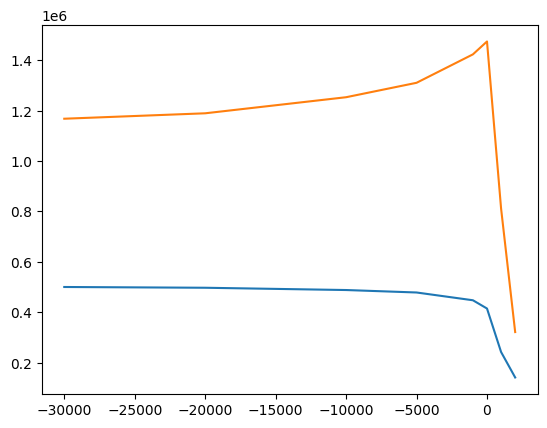

In [273]:
plt.plot(del_sellers, it_cost_for_del_sellers)
plt.plot(del_sellers, revenues_for_del_sellers)

In [266]:
def revenue(total_revenue_from_seller):

    revenue = total_revenue_from_seller['revenues'].sum()
    
    return round(revenue)

In [346]:
#how much sellers are below 0 profit
count_below_profit = len(Seller().get_training_data()) - len(remove_sellers(0))

In [347]:
count_below_profit

376

In [298]:
x = np.arange(1,count_below_profit+1)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [363]:
def remove_sellers_rows(number):
    
    df = Seller().get_training_data()
    df = df.sort_values(['profits'], ascending=[True])

    df = df[number:]
    
    return df

In [349]:
def it_costs(total_revenue_from_seller):
    
    a  = 3157.27
    b = 978.23
    number_sellers = total_revenue_from_seller['seller_id'].count()
    number_products = total_revenue_from_seller['quantity'].sum()
    it_costs = a *np.sqrt(number_sellers) + b * np.sqrt(number_products)
    
    return round(it_costs)

In [369]:
def profit(total_revenue_from_seller):

    profit = total_revenue_from_seller['profits'].sum()
    
    return round(profit)

In [370]:
x_=x.tolist()

In [ ]:
x_ = 

In [371]:
it_cost_for_del_sellers = []
revenues_for_del_sellers = []

for i in x_:
    df = remove_sellers_rows(i)
    it_cost_for_del_sellers.append(it_costs(df))
    revenues_for_del_sellers.append(profit(df))

In [372]:
list_tuples = list(zip(x_, it_cost_for_del_sellers,revenues_for_del_sellers))  

In [373]:
dframe = pd.DataFrame(list_tuples, columns=['num_del_sellers', 'it_costs', 'revenues'])

In [374]:
dframe['profit'] = dframe['revenues'] - dframe['it_costs']

In [375]:
dframe

,num_del_sellers,it_costs,revenues,profit
0,1,496991,1189128,692137
1,2,494024,1206881,712857
2,3,491348,1224462,733114
3,4,489512,1240004,750492
4,5,487946,1252891,764945
...,...,...,...,...
367,368,414903,1474062,1059159
368,369,414870,1474065,1059195
369,370,414834,1474067,1059233
370,371,414780,1474069,1059289


(-18.55, 150.0)

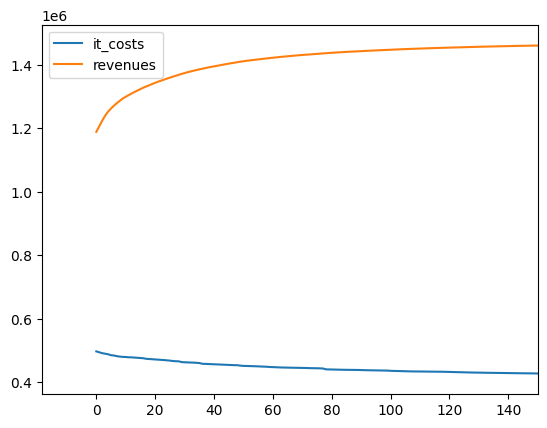

In [434]:
dframe[['it_costs', 'revenues']].plot()
plt.xlim(xmax = 150)

In [427]:
dframe['boosting'] = ((next_prof / cur_prof) - 1) *100

In [414]:
cur_prof = dframe['profit'][0:371]

In [415]:

next_prof = dframe['profit'][1:]

In [425]:
next_prof = next_prof.reset_index(drop=True)

In [428]:
dframe

,num_del_sellers,it_costs,revenues,profit,boosting
0,1,496991,1189128,692137,2.993627
1,2,494024,1206881,712857,2.841664
2,3,491348,1224462,733114,2.370436
3,4,489512,1240004,750492,1.925803
4,5,487946,1252891,764945,1.685350
...,...,...,...,...,...
367,368,414903,1474062,1059159,0.003399
368,369,414870,1474065,1059195,0.003588
369,370,414834,1474067,1059233,0.005287
370,371,414780,1474069,1059289,0.003493


(-18.5, 150.0)

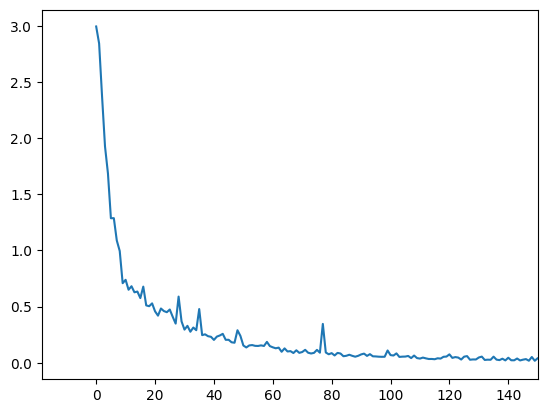

In [432]:
dframe['boosting'].plot()
plt.xlim(xmax = 150)

In [436]:
df = Seller().get_training_data()

In [437]:
df

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [443]:
df.sort_values(['profits'], ascending=[True])


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits,koef_prof_rev
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,0.124729,0.514100,3.937093,35290,1854,2033,1.096548,123304.83,13770.483,-21519.517,-1.562728
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,0.143809,0.482510,3.827873,39400,1806,1987,1.100221,200472.92,21647.292,-17752.708,-0.820089
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,0.116092,0.584483,4.077586,29530,1706,1775,1.040445,104288.42,11948.842,-17581.158,-1.471369
945,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,0.0,13.315562,2017-08-16 15:15:26,2018-08-25 02:45:21,12.0,0.113935,0.527607,3.997371,20220,1146,1203,1.049738,37177.52,4677.752,-15542.248,-3.322589
315,8b321bb669392f5163d04c59e235e066,sao paulo,SP,0.0,12.616899,2017-10-27 16:31:30,2018-08-21 17:08:38,10.0,0.118211,0.568690,4.074547,15440,943,1018,1.079533,17535.69,2553.569,-12886.431,-5.046439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,46dc3b2cc0980fb8ec44634e21d2718e,rio de janeiro,RJ,0.0,11.800424,2016-10-06 15:44:00,2018-08-17 22:49:38,22.0,0.112621,0.629126,4.194175,7500,521,542,1.040307,128111.19,14571.119,7071.119,0.485283
2151,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,0.0,11.709806,2017-09-30 09:49:22,2018-08-20 19:30:10,11.0,0.066265,0.692771,4.421687,1520,166,175,1.054217,79284.55,8808.455,7288.455,0.827439
534,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,0.0,13.341871,2017-01-07 20:55:10,2018-08-29 10:04:16,20.0,0.086059,0.676420,4.339071,6510,585,586,1.001709,194042.03,21004.203,14494.203,0.690062
67,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,0.0,11.335141,2016-10-08 03:19:09,2018-07-14 21:25:19,21.0,0.101493,0.629851,4.214925,4700,336,340,1.011905,176431.87,19323.187,14623.187,0.756769


In [442]:
df['koef_prof_rev'] = df['profits'] / df['revenues']

In [448]:
months_on_olist_sum = df.groupby('months_on_olist',as_index=False).sum()

In [450]:
months_on_olist_count = df.groupby('months_on_olist',as_index=False).count()
months_on_olist_mean = df.groupby('months_on_olist',as_index=False).mean()


In [453]:
months_on_olist = months_on_olist_sum[['months_on_olist', 'revenues', 'n_orders', 'profits']]\
                        .merge(months_on_olist_count[['months_on_olist', 'quantity']], on='months_on_olist')\
                        .merge(months_on_olist_mean[['months_on_olist', 'review_score']], on='months_on_olist')
                        


In [455]:
months_on_olist['koef_prof_rev'] = months_on_olist['profits'] / months_on_olist['revenues']

In [456]:
months_on_olist


,months_on_olist,revenues,n_orders,profits,quantity,review_score,koef_prof_rev
0,0.0,18805.644,883,4285.644,622,4.150846,0.227891
1,1.0,42036.259,1366,23346.259,265,4.134945,0.555384
2,2.0,65873.844,1597,40623.844,249,4.054866,0.616692
3,3.0,101126.018,2353,67776.018,247,4.195378,0.670213
4,4.0,100305.085,2776,59425.085,198,4.098360,0.592443
5,5.0,111015.556,2953,57375.556,148,4.061836,0.516824
6,6.0,109267.175,2506,67087.175,124,3.940584,0.613974
7,7.0,135339.364,4078,59959.364,127,3.919963,0.443030
8,8.0,107041.643,2394,68681.643,106,4.067932,0.641635
9,9.0,139954.058,3991,71674.058,113,4.105995,0.512126


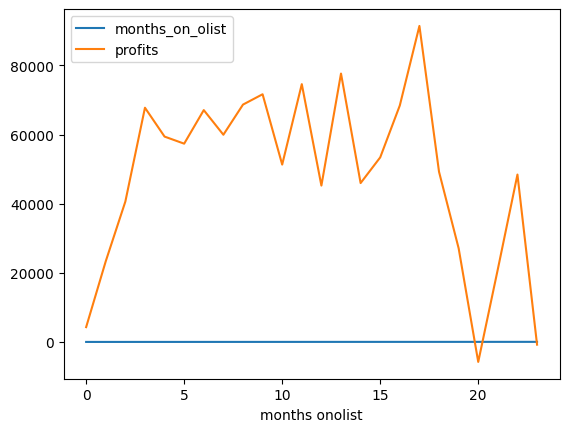

In [463]:
months_on_olist[['months_on_olist', 'profits']].plot()

plt.xlabel('months onolist');
#plt.xlim(xmax = 15);